In [1]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from math import exp,log
import pandas as pd
import numpy as np
import copy

In [2]:
data = pd.read_csv(r"C:\Users\Narahc\Downloads\chip.csv")
data = shuffle(data) 
data.insert(loc=0,column='bias',value=np.ones([data.shape[0],1]))
data.insert(loc=3,column='X1_2',value=(data['test1']*data['test1']))
data.insert(loc=4,column='X2_2',value=(data['test2']*data['test2']))
data.insert(loc=5,column='X1X2',value=(data['test1']*data['test2']))
# print(X1_2)
print(data.head())
inp = data.iloc[:,0:-1]
outp = data.iloc[:,-1:]
# train_data, train_label = inp.iloc[:(int)(inp.shape[0]*.7),:] , outp.iloc[:(int)(inp.shape[0]*.7),:] 
# test_data, test_label = inp.iloc[(int)(inp.shape[0]*.7):,:] , outp.iloc[(int)(inp.shape[0]*.7):,:]
train_data, train_label = inp.iloc[:85,:] , outp.iloc[:85,:] 
test_data, test_label = inp.iloc[85:,:] , outp.iloc[85:,:]
# test_data.shape

     bias    test1    test2      X1_2      X2_2      X1X2  usable
113   1.0 -0.72062  0.53874  0.519293  0.290241 -0.388227       0
42    1.0  0.64459 -0.14108  0.415496  0.019904 -0.090939       1
84    1.0 -0.74366 -0.25804  0.553030  0.066585  0.191894       0
73    1.0  0.79435 -0.55775  0.630992  0.311085 -0.443049       0
39    1.0  0.22984 -0.41155  0.052826  0.169373 -0.094591       1


In [3]:
def sig(X):
    return 1/(1+exp(-X))
vsig=np.vectorize(sig)

def logg(X):
    return log(X)
vlog=np.vectorize(logg)

def cost(H,Y):
    return -(1/len(Y))*(sum(Y*vlog(H)+(1-Y)*vlog(1-H)))

In [4]:
def gradient_descent(X,Y,W,epochs,learning_rate,lamb):
    act_Y = Y.reshape(len(Y))
    cos=[]
    for i in range(epochs):
        h_x=vsig(X.dot(W))
        cos.append(cost(h_x,act_Y))
        regul = W*lamb
        regul[0] = 0
        gradient=X.T.dot(h_x-act_Y) - regul
        W=W-(learning_rate/len(Y))*(gradient)
#         h = sum(h_x*(1-h_x))*(X.T.dot(X))
#         W=W-((np.linalg.inv(h)).dot(gradient))
    return W,cos

(85, 6)
(85, 1)
(6,)
0.35497784718927416


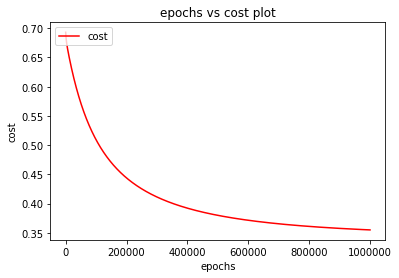

In [5]:
W = np.zeros([inp.shape[1]])
X = np.array(train_data)
Y = np.array(train_label)
print(X.shape)
print(Y.shape)
print(W.shape)
learning_rate = 1e-3
epochs = 1000000
lamb = 0
W,cos=gradient_descent(X,Y,W,epochs,learning_rate,lamb)

x=[i for i in range(epochs)]
print(cos[-1])
plt.plot(x,cos,'-r',label ='cost')
plt.title('epochs vs cost plot')
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

C:\Users\Narahc\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


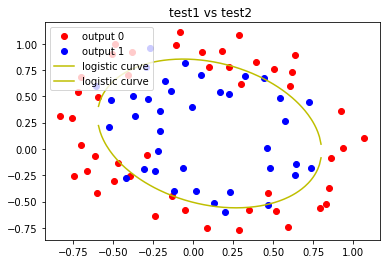

In [6]:
x0 = []
x1 = []
y0 = []
y1 = []
for i in range(len(X)):
  if Y[i]==0:
    x0.append(X[i][1])
    y0.append(X[i][2])
  else:
    x1.append(X[i][1])
    y1.append(X[i][2])
plt.plot(x0,y0,'ro',label ='output 0')
plt.plot(x1,y1,'bo',label ='output 1')
x = np.arange(-1.5,1.0,0.01)
y = (W[2]+(W[5]*x))*((W[2]+(W[5]*x))) - (4*W[4]*(W[0] + (W[3]*x*x) + (W[1]*x)) )
y = np.sqrt(y) 
yy = -(W[2] + W[5]*x) 
plt.plot(x,(yy-y)/(2*W[4]),'-y',label ='logistic curve')
plt.plot(x,(yy+y)/(2*W[4]),'-y',label ='logistic curve')
plt.title('test1 vs test2 ')
plt.legend(loc='upper left')
plt.show()

In [7]:
print(" Weights we got : ", W)
X = np.array(test_data)
Y = np.array(test_label)

prediction = np.round(vsig(X.dot(W)))
print("Total test samples : ",len(Y))
print("Wrongly predicticed test samples : ",sum(abs(prediction-Y.reshape(len(Y)))))
print("Accuracy : ",(1-sum(abs(prediction-Y.reshape(len(Y))))/len(Y))*100)

 Weights we got :  [ 3.77545406  2.46296211  3.005693   -8.92530275 -8.74500698 -4.19038197]
Total test samples :  33
Wrongly predicticed test samples :  7.0
Accuracy :  78.78787878787878


(85, 6)
(85, 1)


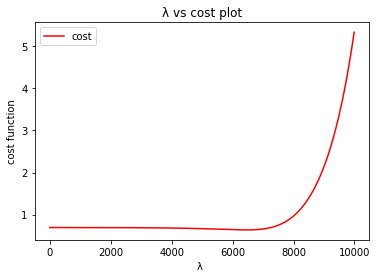

In [10]:
X = np.array(train_data)
Y = np.array(train_label)
print(X.shape)
print(Y.shape)
l_cos = []
x = []
learning_rate = 1e-3
epochs = 100
for i in range(0,10000,10):
    WG = np.zeros([inp.shape[1]])
    WG,cos=gradient_descent(X,Y,WG,epochs,learning_rate,i)
    x.append(i)
    l_cos.append(cos[-1])

plt.plot(x,l_cos,'-r',label ='cost')
plt.title('λ vs cost plot')
plt.legend(loc='upper left')
plt.xlabel('λ ')
plt.ylabel('cost function')
plt.show()